<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/X_ray_gaussian_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: 고주파 노이즈를 감소시켜 전반적인 이미지 품질을 개선.**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# 원본 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/X-ray/X-ray 이미지/normal_10.jpg'
xray_image = io.imread(image_path, as_gray=True)

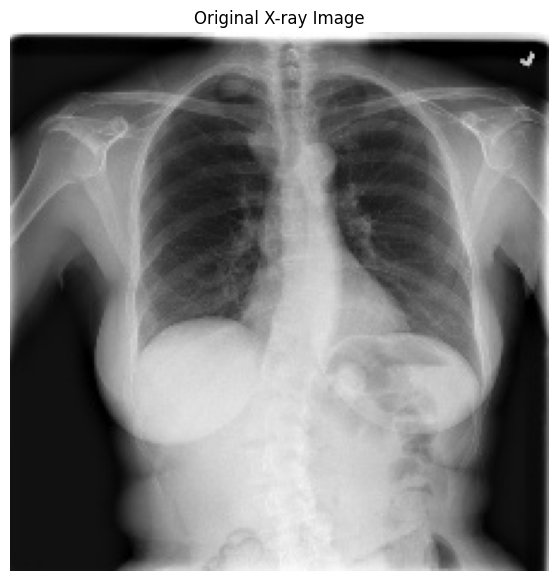

In [ ]:
# 원본 이미지 시각화

plt.figure(figsize=(7, 7))
plt.imshow(xray_image, cmap='gray')
plt.title("Original X-ray Image")
plt.axis('off')
plt.show()

In [ ]:
# 이미지의 uint8 형식 변환
xray_image_uint8 = (xray_image * 255).astype('uint8')

In [ ]:
# Gaussian 필터 적용 (커널 크기: 5x5, 표준 편차: 1)

# 커널 홀수 크기를 기본적으로 사용 => 5x5, 3x3.....

# 커널 크기와 표준 편차(sigma)가 클수록 더 부드럽게 처리된다,
# 이에 따라서 사진이 흐릿해 진다고 느낄 수 있다. -> 고주파 성분을 줄이기 때문에
# 이때 커널의 크기가 커지면 많은 픽셀이 평균화에 포함되어 이미지의 섬세한 디테일이 희석 될 수 있다.

# 해당 기술은 노이즈 제거에 효과적이지만 디테일이 중요한 case의 경우 신중히 사용 해야한다.
# 디테일이 중요한 case 면 Median Filtering 같은 기술이 적합 할 수 있다.

# Gaussian Filtering은 Median Filtering에 비해서 랜덤하게 발생하는
# 랜덤하게 발생하는 고주파 노이즈 제거에 효과적이며
# 이미지가 부드럽게 처리되어 자연스러운 흐림 효과를 원할때 유리하다

gaussian_image = cv2.GaussianBlur(xray_image_uint8, (5, 5), 1)

**전처리 전후 이미지 비교**

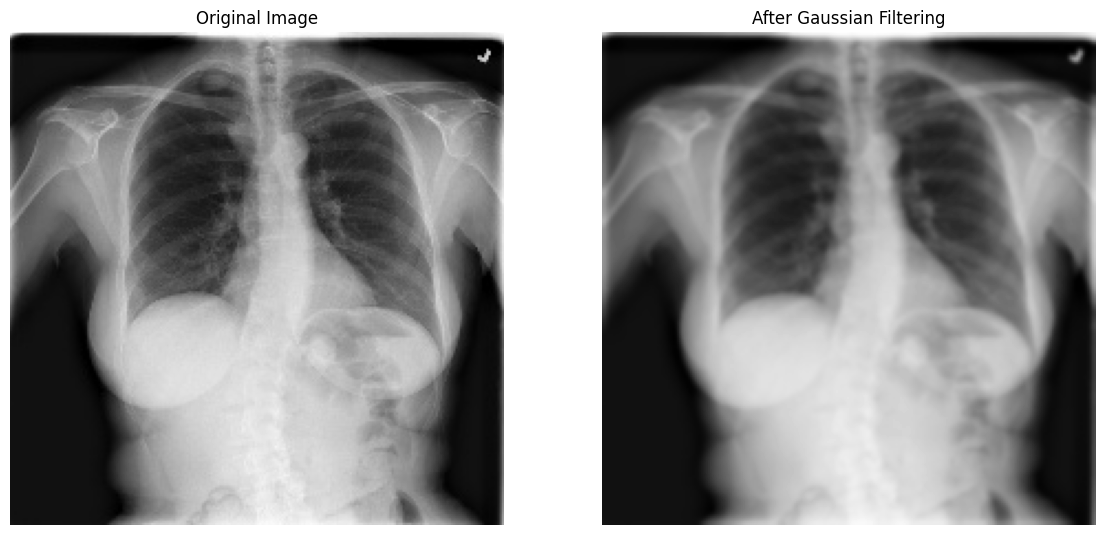

In [ ]:

plt.figure(figsize=(14, 7))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gaussian Filtering 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(gaussian_image, cmap='gray')
plt.title("After Gaussian Filtering")
plt.axis('off')

plt.show()